In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [2]:
df = pd.read_csv('netflix_titles.csv')

In [3]:
df.head()

show_id     type                                    title  \
0  81145628    Movie  Norm of the North: King Sized Adventure   
1  80117401    Movie               Jandino: Whatever it Takes   
2  70234439  TV Show                       Transformers Prime   
3  80058654  TV Show         Transformers: Robots in Disguise   
4  80125979    Movie                             #realityhigh   

                   director  \
0  Richard Finn, Tim Maltby   
1                       NaN   
2                       NaN   
3                       NaN   
4          Fernando Lebrija   

                                                cast  \
0  Alan Marriott, Andrew Toth, Brian Dobson, Cole...   
1                                   Jandino Asporaat   
2  Peter Cullen, Sumalee Montano, Frank Welker, J...   
3  Will Friedle, Darren Criss, Constance Zimmer, ...   
4  Nesta Cooper, Kate Walsh, John Michael Higgins...   

                                    country         date_added  release_year  \
0  United States, India, South Korea, China  September 9, 2019          2019   
1                            United Kingdom  September 9, 2016          2016   
2                             United States  September 8, 2018          2013   
3                             United States  September 8, 2018          2016   
4                             United States  September 8, 2017          2017   

     rating  duration                           listed_in  \
0     TV-PG    90 min  Children & Family Movies, Comedies   
1     TV-MA    94 min                     Stand-Up Comedy   
2  TV-Y7-FV  1 Season                            Kids' TV   
3     TV-Y7  1 Season                            Kids' TV   
4     TV-14    99 min                            Comedies   

                                         description  
0  Before planning an awesome wedding for his gra...  
1  Jandino Asporaat riffs on the challenges of ra...  
2  With the help of three human allies, the Autob...  
3  When a prison ship crash unleashes hundreds of...  
4  When nerdy high schooler Dani finally attracts...

In [4]:
df.isnull().sum() #looking for null values

show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64

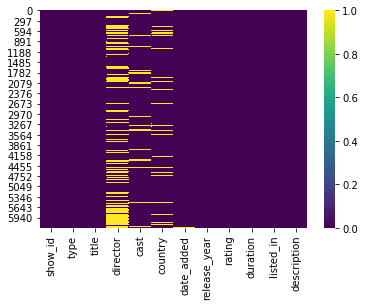

In [5]:
sns.heatmap(df.isnull(),cmap = 'viridis')

We have null values in director, cast,country,date_added and rating.

In [6]:
df['rating'].value_counts().unique()

array([2027, 1698,  701,  508,  286,  218,  184,  169,  149,  143,   95,
         37,    7,    2], dtype=int64)

In the above results, we may opt to absolutely remove the director and cast columns because they aren't a big part for us when we're analyzing the data and they don't add any significant value to our research. We're concentrating only on visualizing this info, so dropping two columns won't be a issue for us. But this shouldn't be a daily activity because if we're making a recommender program, we can't drop the director and cast a movie because it's a key feature used to recommend movies to users.

In [7]:
df.drop(['director','cast'],axis = 1,inplace = True)

In [8]:
df.head()

show_id     type                                    title  \
0  81145628    Movie  Norm of the North: King Sized Adventure   
1  80117401    Movie               Jandino: Whatever it Takes   
2  70234439  TV Show                       Transformers Prime   
3  80058654  TV Show         Transformers: Robots in Disguise   
4  80125979    Movie                             #realityhigh   

                                    country         date_added  release_year  \
0  United States, India, South Korea, China  September 9, 2019          2019   
1                            United Kingdom  September 9, 2016          2016   
2                             United States  September 8, 2018          2013   
3                             United States  September 8, 2018          2016   
4                             United States  September 8, 2017          2017   

     rating  duration                           listed_in  \
0     TV-PG    90 min  Children & Family Movies, Comedies   
1     TV-MA    94 min                     Stand-Up Comedy   
2  TV-Y7-FV  1 Season                            Kids' TV   
3     TV-Y7  1 Season                            Kids' TV   
4     TV-14    99 min                            Comedies   

                                         description  
0  Before planning an awesome wedding for his gra...  
1  Jandino Asporaat riffs on the challenges of ra...  
2  With the help of three human allies, the Autob...  
3  When a prison ship crash unleashes hundreds of...  
4  When nerdy high schooler Dani finally attracts...

We replaced all of the Nan values in the country column with U.S. because Netflix was created in the U.S. and each show is broadcast on Netflix U.S. So instead of removing the whole column we only replaced the values in it to save our data.

In [9]:
df['country'].replace(np.nan, 'United States',inplace  = True)

We've already released year for each film and thus, even though we haven't released date, our analysis won't be affected. Then we may lower the column of the published date.

In [10]:
df.drop(['date_added'],axis =1,inplace = True)

In [11]:
df.head()

show_id     type                                    title  \
0  81145628    Movie  Norm of the North: King Sized Adventure   
1  80117401    Movie               Jandino: Whatever it Takes   
2  70234439  TV Show                       Transformers Prime   
3  80058654  TV Show         Transformers: Robots in Disguise   
4  80125979    Movie                             #realityhigh   

                                    country  release_year    rating  duration  \
0  United States, India, South Korea, China          2019     TV-PG    90 min   
1                            United Kingdom          2016     TV-MA    94 min   
2                             United States          2013  TV-Y7-FV  1 Season   
3                             United States          2016     TV-Y7  1 Season   
4                             United States          2017     TV-14    99 min   

                            listed_in  \
0  Children & Family Movies, Comedies   
1                     Stand-Up Comedy   
2                            Kids' TV   
3                            Kids' TV   
4                            Comedies   

                                         description  
0  Before planning an awesome wedding for his gra...  
1  Jandino Asporaat riffs on the challenges of ra...  
2  With the help of three human allies, the Autob...  
3  When a prison ship crash unleashes hundreds of...  
4  When nerdy high schooler Dani finally attracts...

In [12]:
df['rating'].value_counts()

TV-MA       2027
TV-14       1698
TV-PG        701
R            508
PG-13        286
NR           218
PG           184
TV-Y7        169
TV-G         149
TV-Y         143
TV-Y7-FV      95
G             37
UR             7
NC-17          2
Name: rating, dtype: int64

In [13]:
df['listed_in'].value_counts()

Documentaries                                              299
Stand-Up Comedy                                            273
Dramas, International Movies                               248
Dramas, Independent Movies, International Movies           186
Comedies, Dramas, International Movies                     174
                                                          ... 
Action & Adventure, Classic Movies, Sci-Fi & Fantasy         1
Dramas, Faith & Spirituality, Independent Movies             1
International Movies, Romantic Movies, Sci-Fi & Fantasy      1
TV Action & Adventure, TV Horror, TV Sci-Fi & Fantasy        1
Docuseries, Science & Nature TV, TV Dramas                   1
Name: listed_in, Length: 461, dtype: int64

As we can see in our ranking column we have only 10 missing values, so we can either remove them or replace them. We have the most popular raing TV-MA and therefore we can substitute all these nan values with TV-MA.

In [14]:
df['rating'].replace(np.nan, 'TV-MA',inplace  = True)

In [15]:
df.isnull().sum()

show_id         0
type            0
title           0
country         0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

We have now dealt with all of our missing data so that we can start visualizing our data.

In [16]:
df.head()

show_id     type                                    title  \
0  81145628    Movie  Norm of the North: King Sized Adventure   
1  80117401    Movie               Jandino: Whatever it Takes   
2  70234439  TV Show                       Transformers Prime   
3  80058654  TV Show         Transformers: Robots in Disguise   
4  80125979    Movie                             #realityhigh   

                                    country  release_year    rating  duration  \
0  United States, India, South Korea, China          2019     TV-PG    90 min   
1                            United Kingdom          2016     TV-MA    94 min   
2                             United States          2013  TV-Y7-FV  1 Season   
3                             United States          2016     TV-Y7  1 Season   
4                             United States          2017     TV-14    99 min   

                            listed_in  \
0  Children & Family Movies, Comedies   
1                     Stand-Up Comedy   
2                            Kids' TV   
3                            Kids' TV   
4                            Comedies   

                                         description  
0  Before planning an awesome wedding for his gra...  
1  Jandino Asporaat riffs on the challenges of ra...  
2  With the help of three human allies, the Autob...  
3  When a prison ship crash unleashes hundreds of...  
4  When nerdy high schooler Dani finally attracts...

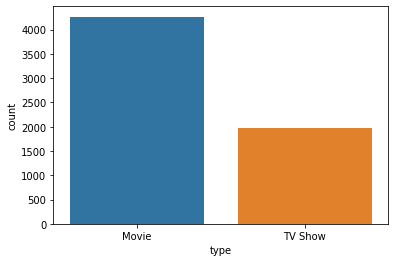

In [17]:
sns.countplot(x='type',data = df) #looking at number of Movies and TV shows

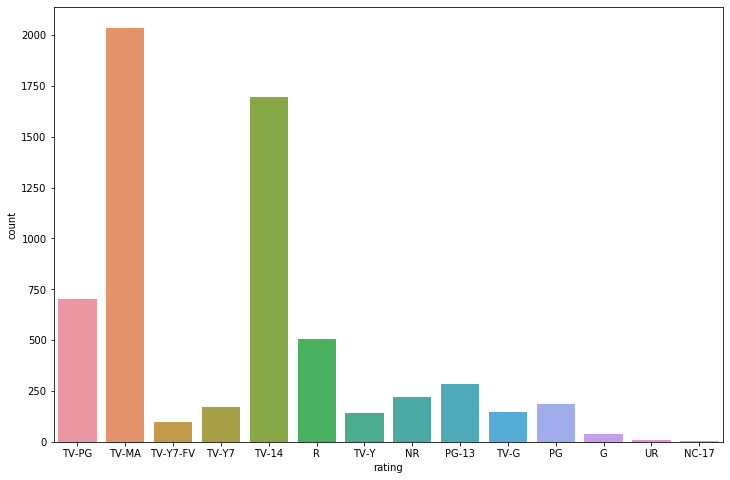

In [18]:
plt.figure(figsize = (12,8))
sns.countplot(x='rating',data = df)

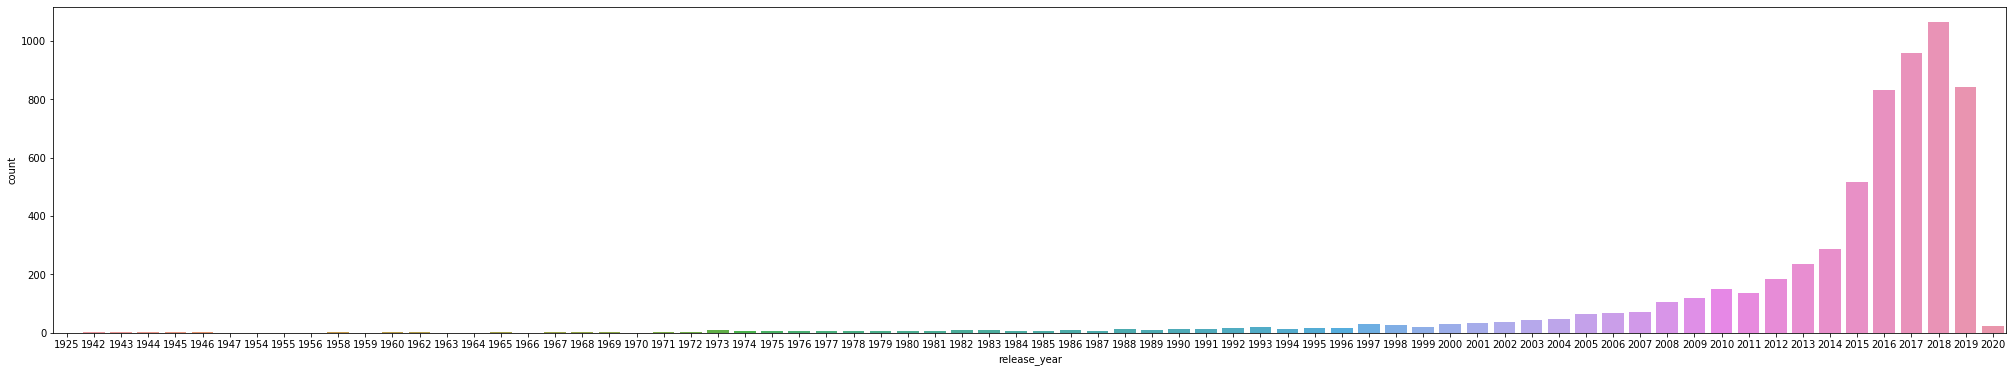

In [19]:
plt.figure(figsize = (35,6))
sns.countplot(x='release_year',data = df)

As we can see most of Netflix's films and TV shows were released in the last ten years, although none were released previously.

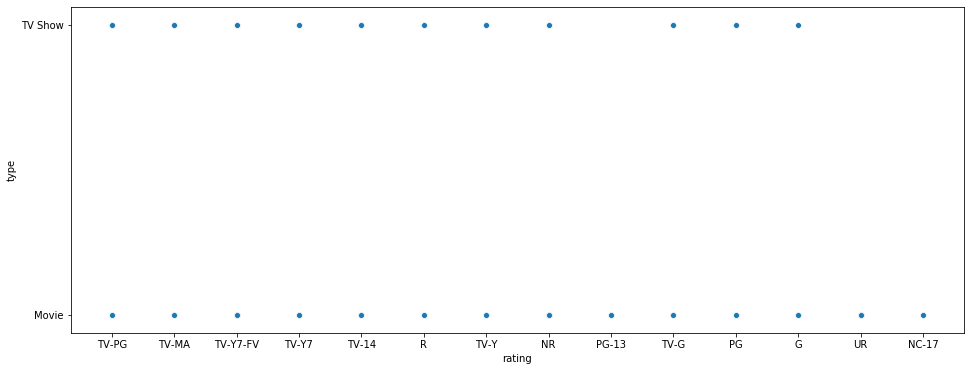

In [20]:
plt.figure(figsize=(16,6))
sns.scatterplot(x='rating',y='type',data = df) #analysing the type, whether its a movie or a movie v/s the rating it has

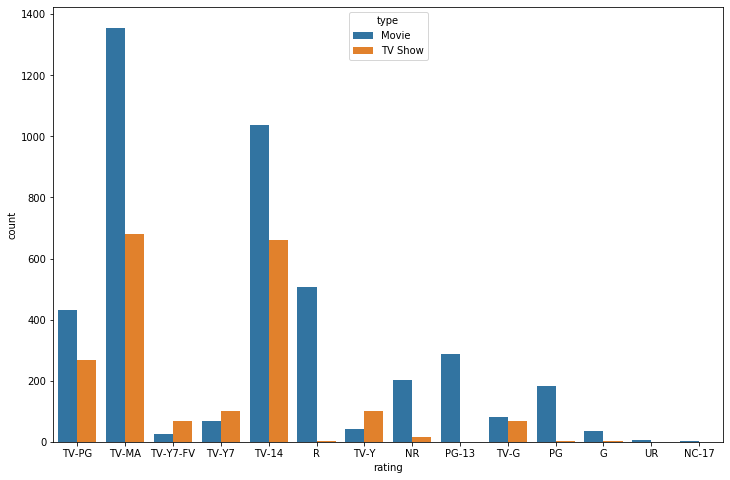

In [21]:
plt.figure(figsize = (12,8))
sns.countplot(x='rating',data = df,hue='type')

In [23]:
!pip install plotly_express==0.4.1
import plotly.express as px #distribution according to countries
top_rated=df[0:10]
fig =px.sunburst(
    top_rated,
    path=['country'])
fig.show()

  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11435 sha256=fcda13ab79a0d9f1a4ba0f06555f518f0951e753a8d8a9aa3dad30716cde0b1a
  Stored in directory: c:\users\family pc\appdata\local\pip\cache\wheels\f9\8d\8d\f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying


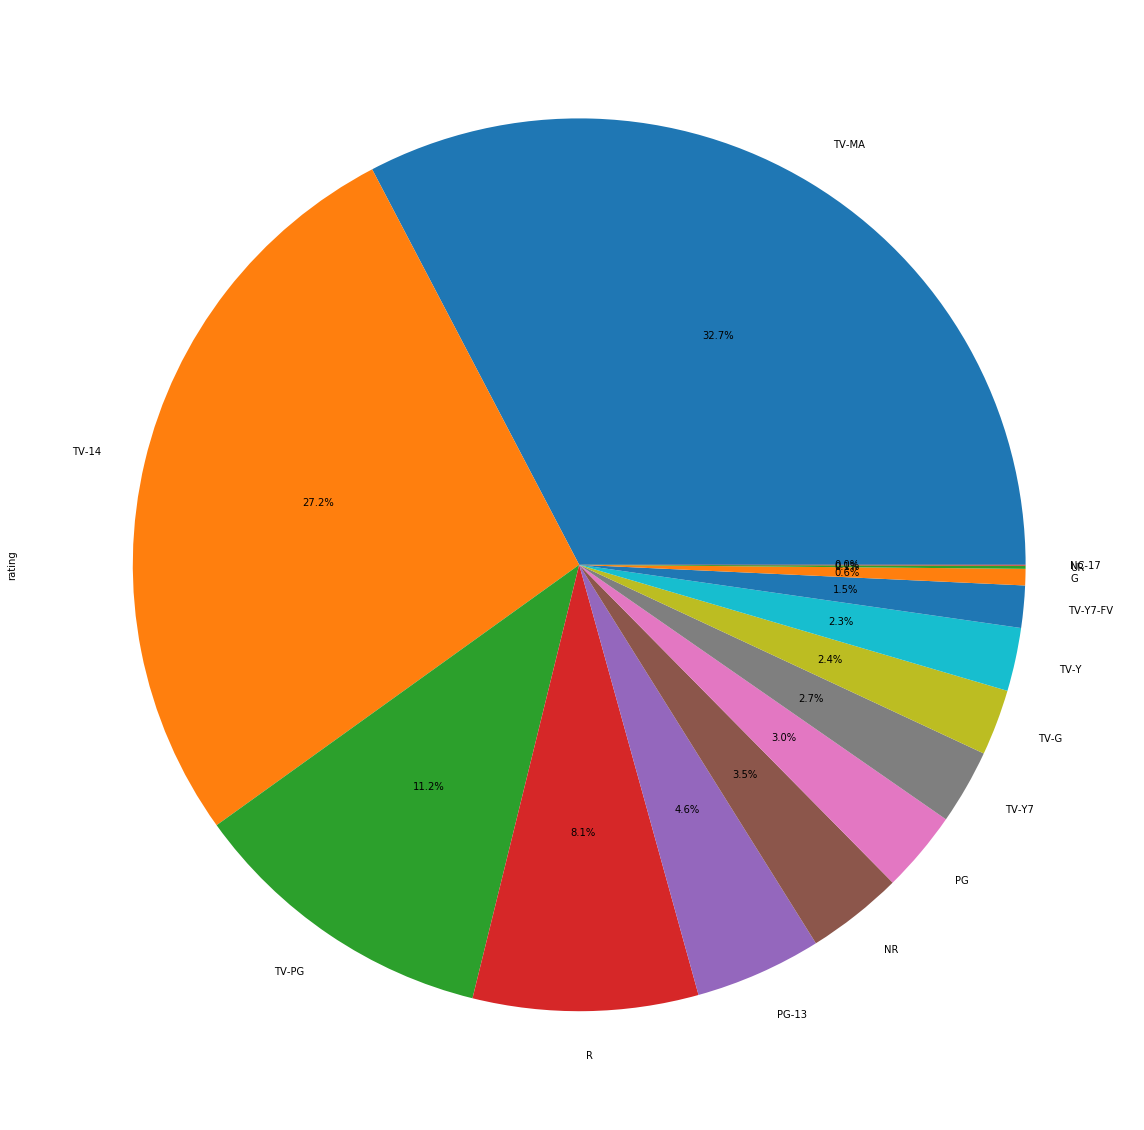

In [24]:
df['rating'].value_counts().plot.pie(autopct='%1.1f%%',figsize=(20,35)) #distribution according to the rating
plt.show()

In [27]:
country_counter=df['country'].value_counts().sort_values(ascending=False) #countries with the most rated content
country_counter=pd.DataFrame(country_counter)
topcountry=country_counter[0:11]
topcountry

country
United States      2508
India               777
United Kingdom      348
Japan               176
Canada              141
South Korea         136
Spain               117
France               90
Mexico               83
Turkey               79
Australia            71

In [28]:
old = df.sort_values("release_year", ascending = True) #oldest movies available on netflix
old = old[old['duration'] != ""]
old[['title', "release_year"]][:15]

title  release_year
4292                 Pioneers: First Women Filmmakers*          1925
2011                                    Prelude to War          1942
2013                              The Battle of Midway          1942
2022     Undercover: How to Operate Behind Enemy Lines          1943
2023                Why We Fight: The Battle of Russia          1943
2026                   WWII: Report from the Aleutians          1943
2017  The Memphis Belle: A Story of a\nFlying Fortress          1944
2019                                 The Negro Soldier          1944
2021                                  Tunisian Victory          1944
2012                                        San Pietro          1945
2009                          Nazi Concentration Camps          1945
2005                           Know Your Enemy - Japan          1945
2930                                      The Stranger          1946
4079               Pioneers of African-American Cinema          1946
2006                                Let There Be Light          1946

In [29]:
tag = "Stand-Up Comedy" #standup shows on Netflix
df["relevant"] = df['listed_in'].fillna("").apply(lambda x : 1 if tag.lower() in x.lower() else 0)
com = df[df["relevant"] == 1]
com[com["country"] == "United States"][["title", "country","release_year"]].head(10)

title        country  \
10                         Joaquín Reyes: Una y no más  United States   
53                                Marc Maron: Too Real  United States   
113                                  Def Comedy Jam 25  United States   
126                        Jeff Dunham: Beside Himself  United States   
134                  Iliza Shlesinger: Confirmed Kills  United States   
181                              Jerry Before Seinfeld  United States   
183  Karol Modzelewski, Łukasz „Lotek” Lodkowski No...  United States   
184   Katarzyna Piasecka, Rafał Pacześ Seriously Funny  United States   
185  Mariusz Kałamaga, Karol Kopiec, Wiolka Walaszc...  United States   
186            Rafał Banaś, Michał Leja Laugh out Loud  United States   

     release_year  
10           2017  
53           2017  
113          2017  
126          2019  
134          2016  
181          2017  
183          2016  
184          2016  
185          2016  
186          2016

In [30]:
tag = "Kids' TV" #Kids TV shows on Netflix
df["relevant"] = df['listed_in'].fillna("").apply(lambda x : 1 if tag.lower() in x.lower() else 0)
com = df[df["relevant"] == 1]
com[com["country"] == "United States"][["title", "country","release_year"]].head(10)

title        country  release_year
2                  Transformers Prime  United States          2013
3    Transformers: Robots in Disguise  United States          2016
34         Archibald's Next Big Thing  United States          2019
64                             Ben 10  United States          2016
70                      We Bare Bears  United States          2017
101            Dragons: Rescue Riders  United States          2019
131                       Team Kaylie  United States          2019
175        Kulipari: An Army of Frogs  United States          2016
203            The Last Kids on Earth  United States          2019
262      Super Monsters Monster Party  United States          2018

In [31]:
df_countries = pd.DataFrame(df.country.value_counts().reset_index().values, columns=["country", "count"])
df_countries.head()

country count
0   United States  2508
1           India   777
2  United Kingdom   348
3           Japan   176
4          Canada   141

In [32]:
fig = px.choropleth(   #distribution of content on basis of countries
    locationmode='country names',
    locations=df_countries.country,
    labels=df_countries["count"]
)
fig.show()

In [33]:
date = pd.DataFrame(df.release_year.value_counts().reset_index().values, columns=["Year", "Count"])
date.head()

Year  Count
0  2018   1063
1  2017    959
2  2019    843
3  2016    830
4  2015    517

Text(0.5, 1.0, 'Frequency of Movies which were released in different years and are available on Netflix')

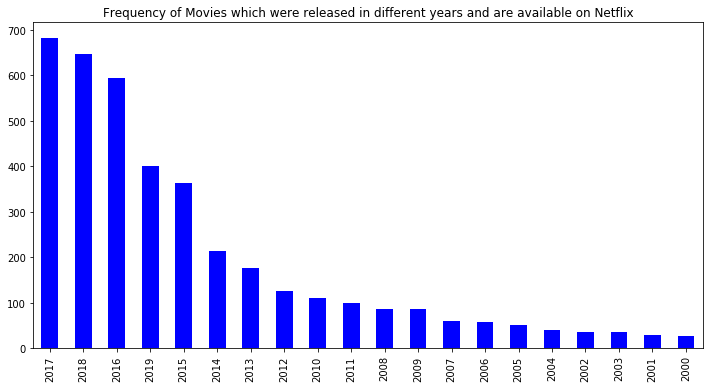

In [35]:
plt.figure(figsize=(12,6))
df[df["type"]=="Movie"]["release_year"].value_counts()[:20].plot(kind="bar",color="blue")
plt.title("Frequency of Movies which were released in different years and are available on Netflix")

Text(0.5, 1.0, 'Frequency of TV shows which were released in different years and are available on Netflix')

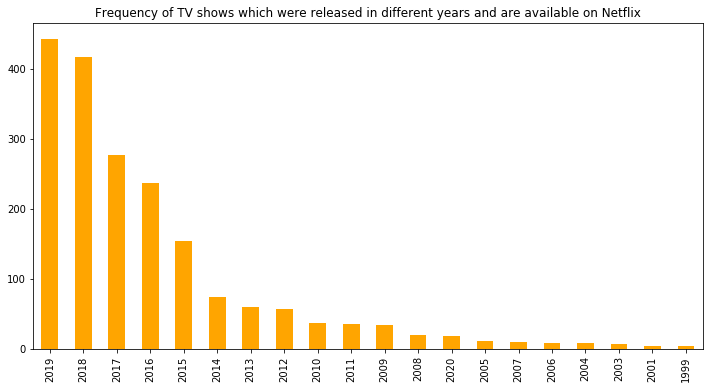

In [36]:
plt.figure(figsize=(12,6))
df[df["type"]=="TV Show"]["release_year"].value_counts()[:20].plot(kind="bar",color="orange")
plt.title("Frequency of TV shows which were released in different years and are available on Netflix")

Text(0.5, 1.0, 'Top 10 Genres of Movies')

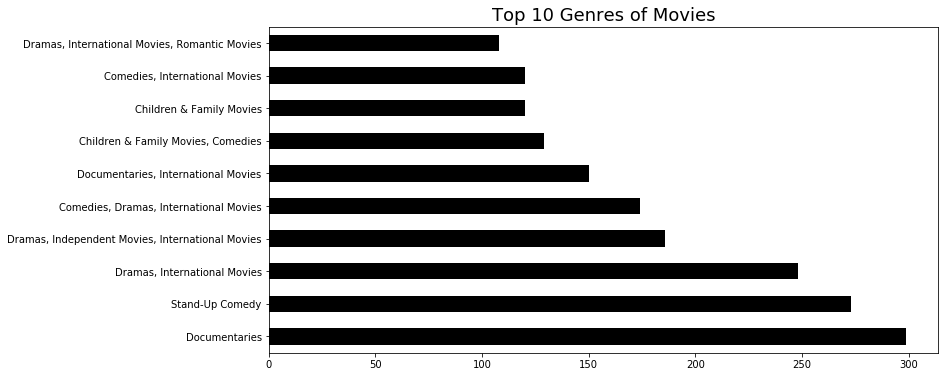

In [37]:
plt.figure(figsize=(12,6))
df[df["type"]=="Movie"]["listed_in"].value_counts()[:10].plot(kind="barh",color="black")
plt.title("Top 10 Genres of Movies",size=18)

Text(0.5, 1.0, 'Top 10 Genres of TV Shows')

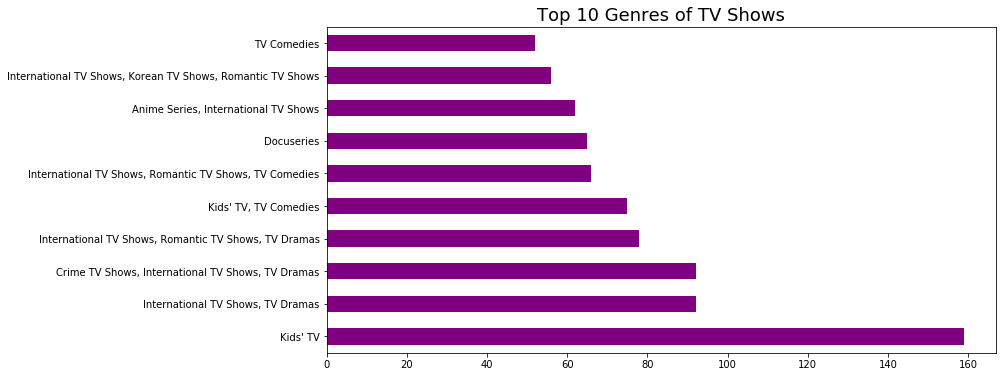

In [38]:
plt.figure(figsize=(12,6))
df[df["type"]=="TV Show"]["listed_in"].value_counts()[:10].plot(kind="barh",color="purple")
plt.title("Top 10 Genres of TV Shows",size=18)

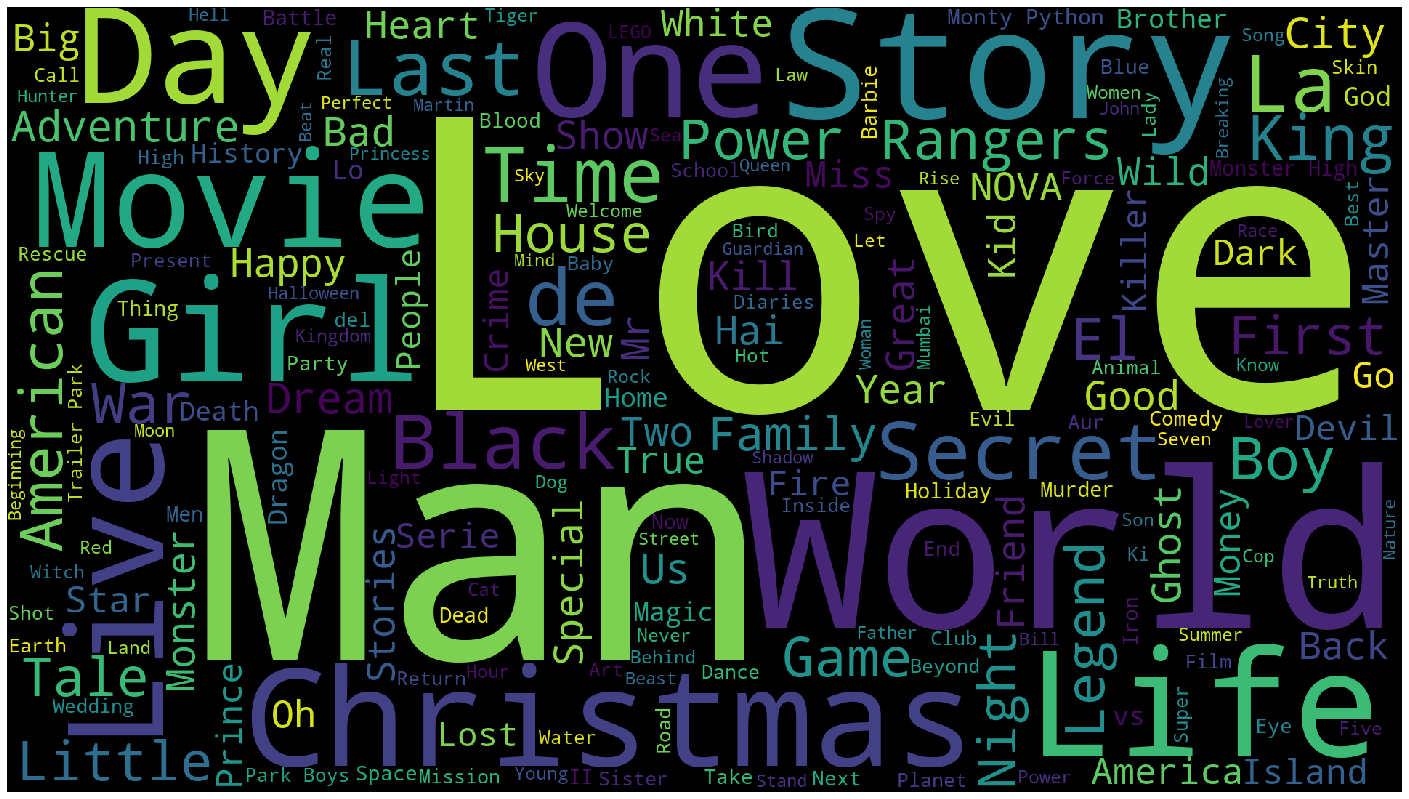

In [40]:
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='Black',
                          width=1920,
                          height=1080
                         ).generate(" ".join(df.title))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('cast.png')
plt.show()

That's it for now. I'll be updating more on visualizations if needed. Thanks a lot!